# Connected Components

In [34]:
import numpy as np
import sys, os
import cc3d

import matplotlib.pyplot as plt

In [35]:
# Crear la matriz base
shape = (10, 10, 10)
fila = np.zeros(shape, dtype=int)

# Definir 5 filamentos diferentes en posiciones separadas
fila[1:5, 1, 1] = 1            # Filamento 1: vertical
fila[2, 2:7, 2] = 1            # Filamento 2: horizontal
fila[3, 3, 3:8] = 1            # Filamento 3: profundo
fila[5:9, 5, 5] = 2            # Filamento 4: otro vertical
fila[6, 6:10, 6] = 2          # Filamento 5: horizontal superior

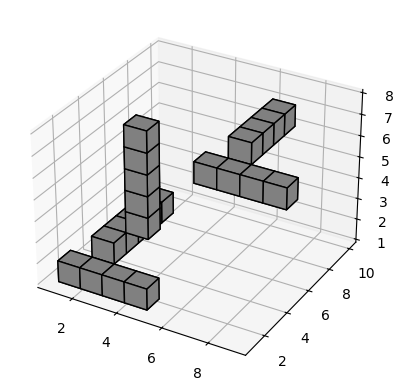

In [36]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.voxels(fila, color='grey', edgecolor="k")

plt.show()

### connected_components, connectivity=26 (crux + diagonal)

In [37]:
# genero matriz donde entren los datos
mat=np.zeros([10,10,10])

# inicializo a 1 en las coordenadas del filamento (xi,yi,zi = idx_fil_sp_i)
mat[fila==1]=1
mat[fila==2]=1

# limites
min_xi=0; max_xi=10
min_yi=0; max_yi=10
min_zi=0; max_zi=10

labels_out = cc3d.connected_components(mat[min_xi:max_xi, min_yi:max_yi, min_zi:max_zi])
stats = cc3d.statistics(labels_out)
               
#numero subfil(labels) del filamento
N = np.max(labels_out) #label mas alto
print('Numero de sub-filamentos/labels=',N , '  (incluye label==0)')

Numero de sub-filamentos/labels= 2   (incluye label==0)


In [38]:
stats

{'voxel_counts': array([978,  14,   8], dtype=uint32),
 'bounding_boxes': [(slice(0, 10, None),
   slice(0, 10, None),
   slice(0, 10, None)),
  (slice(1, 5, None), slice(1, 7, None), slice(1, 8, None)),
  (slice(5, 9, None), slice(5, 10, None), slice(5, 7, None))],
 'centroids': array([[4.51431493, 4.51022495, 4.51635992],
        [2.5       , 2.78571429, 2.78571429],
        [6.25      , 6.25      , 5.5       ]])}

In [39]:
# The fist elelement  of this array is associated with the voxels whitout filam   (fila==0)
stats['voxel_counts']

array([978,  14,   8], dtype=uint32)

1 , mem= 14
2 , mem= 8


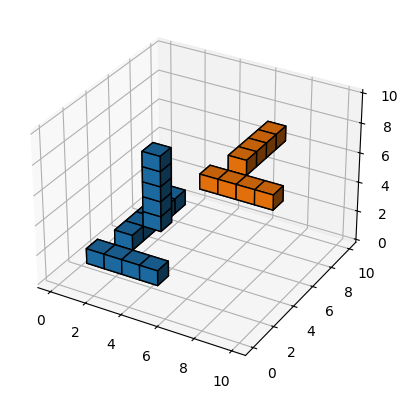

In [40]:
len_min_fila=1

fig = plt.figure()
ax = plt.axes(projection='3d')

#empiezo el lazo por cero para evitar el primer label
for segid in range(1, N+1):
        mem = stats['voxel_counts'][segid]
        print(segid,', mem=', stats['voxel_counts'][segid])  
        if (mem < len_min_fila): continue
        vox = labels_out * (labels_out == segid)
         
        ax.voxels(vox, edgecolor="k")

plt.show()

## connected_components, connectivity=6 (crux )

In [41]:
labels_out = cc3d.connected_components(mat[min_xi:max_xi, min_yi:max_yi, min_zi:max_zi],
                                        connectivity=6)  #connectivity=6 --> cruz
stats = cc3d.statistics(labels_out)
               
#numero subfil(labels) del filamento
N = np.max(labels_out) #label mas alto
print('Numero de sub-filamentos/labels=',N , '  (incluye label==0)')
stats['voxel_counts']

Numero de sub-filamentos/labels= 5   (incluye label==0)


array([978,   4,   5,   5,   4,   4], dtype=uint32)

1 , mem= 4
2 , mem= 5
3 , mem= 5
4 , mem= 4
5 , mem= 4


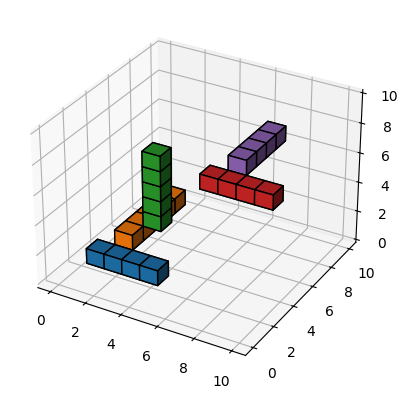

In [42]:
len_min_fila=1

fig = plt.figure()
ax = plt.axes(projection='3d')

#empiezo el lazo por cero para evitar el primer label
for segid in range(1, N+1):
        mem = stats['voxel_counts'][segid]
        print(segid,', mem=', stats['voxel_counts'][segid])  
        if (mem < len_min_fila): continue
        vox = labels_out * (labels_out == segid)
         
        ax.voxels(vox, edgecolor="k")

plt.show()

### Matplotlib is too slow to plot voxels. We use plotly

In [43]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

pio.renderers.default = 'notebook_connected'
#pio.renderers.default = 'iframe_connected'  # O usa 'notebook', 'vscode', 'colab', según el entorno

from myplotly import plotter_str_den, plotter_str
from myplotly import plot_mesh, plot_mesh_cmap, plot_go_3d, plot_go_cmap

In [44]:
x1, y1, z1 = np.where(fila==1)
data1 = plot_mesh(x1, y1, z1, col='blue', op=0.5, voxel_size=0.9, name='Data1')

x2, y2, z2 = np.where(fila==2)
data2 = plot_mesh(x2, y2, z2, col='red', op=0.5, voxel_size=0.9, name='Data2')

fig = go.Figure(data=[data1, data2])

fig.update_layout(width=500, height=500)
fig.show()